In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("C:/Users/GAYATHRI ANIL/Desktop/MLOPS PROJECT/full_filled_stroke_data (1).csv")

In [5]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.555602,never smoked,1
1,Female,59.0,0,0,Yes,Private,Rural,76.15,30.242937,Unknown,1
2,Male,78.0,0,1,Yes,Private,Urban,219.84,30.698951,Unknown,1
3,Male,57.0,0,1,No,Govt_job,Urban,217.08,33.808410,Unknown,1
4,Male,58.0,0,0,Yes,Private,Rural,189.84,31.378534,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
196,Male,41.0,0,0,No,Private,Rural,70.15,29.756631,formerly smoked,0
197,Male,40.0,0,0,Yes,Private,Urban,191.15,31.124172,smokes,0
198,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.798304,smokes,0
199,Male,40.0,0,0,Yes,Private,Rural,83.94,29.951301,smokes,0


In [6]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.555602,never smoked,1
1,Female,59.0,0,0,Yes,Private,Rural,76.15,30.242937,Unknown,1
2,Male,78.0,0,1,Yes,Private,Urban,219.84,30.698951,Unknown,1
3,Male,57.0,0,1,No,Govt_job,Urban,217.08,33.808410,Unknown,1
4,Male,58.0,0,0,Yes,Private,Rural,189.84,31.378534,Unknown,1
5,Male,59.0,0,0,Yes,Private,Rural,211.78,33.484568,formerly smoked,1
6,Female,63.0,0,0,Yes,Private,Urban,90.90,30.042545,formerly smoked,1
7,Female,75.0,0,1,No,Self-employed,Urban,109.78,28.318273,Unknown,1
8,Female,76.0,0,0,No,Private,Urban,89.96,28.397893,Unknown,1
9,Male,78.0,1,0,Yes,Private,Urban,75.32,29.139780,formerly smoked,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             201 non-null    object 
 1   age                201 non-null    float64
 2   hypertension       201 non-null    int64  
 3   heart_disease      201 non-null    int64  
 4   ever_married       201 non-null    object 
 5   work_type          201 non-null    object 
 6   Residence_type     201 non-null    object 
 7   avg_glucose_level  201 non-null    float64
 8   bmi                201 non-null    float64
 9   smoking_status     201 non-null    object 
 10  stroke             201 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 17.4+ KB


In [8]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data.nunique()

gender                 2
age                   73
hypertension           2
heart_disease          2
ever_married           2
work_type              4
Residence_type         2
avg_glucose_level    199
bmi                  179
smoking_status         4
stroke                 2
dtype: int64

In [10]:
data['smoking_status'].unique()

array(['never smoked', 'Unknown', 'formerly smoked', 'smokes'],
      dtype=object)

In [11]:
data['work_type'].unique()

array(['Self-employed', 'Private', 'Govt_job', 'children'], dtype=object)

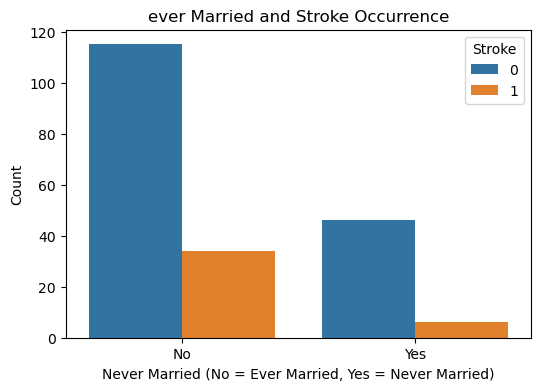

In [17]:
plt.figure(figsize=(6,4))
# Creating a new column for never_married
data['ever_married'] = data['ever_married'].apply(lambda x: 'No' if x == 'Yes' else 'Yes')

sns.countplot(x='ever_married', hue='stroke', data=data)
plt.title('ever Married and Stroke Occurrence')
plt.xlabel('Never Married (No = Ever Married, Yes = Never Married)')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.show()

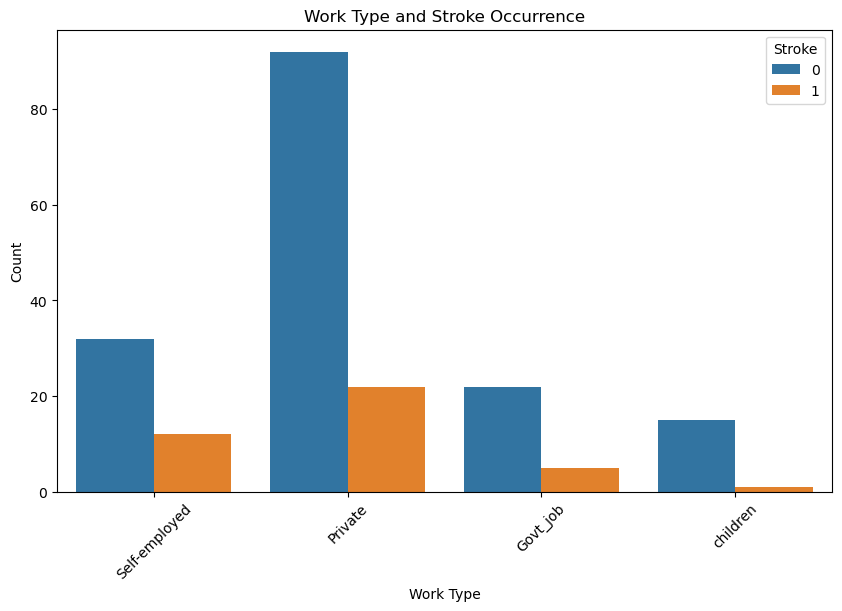

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='work_type', hue='stroke', data=data)
plt.title('Work Type and Stroke Occurrence')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke', loc='upper right')
plt.show()

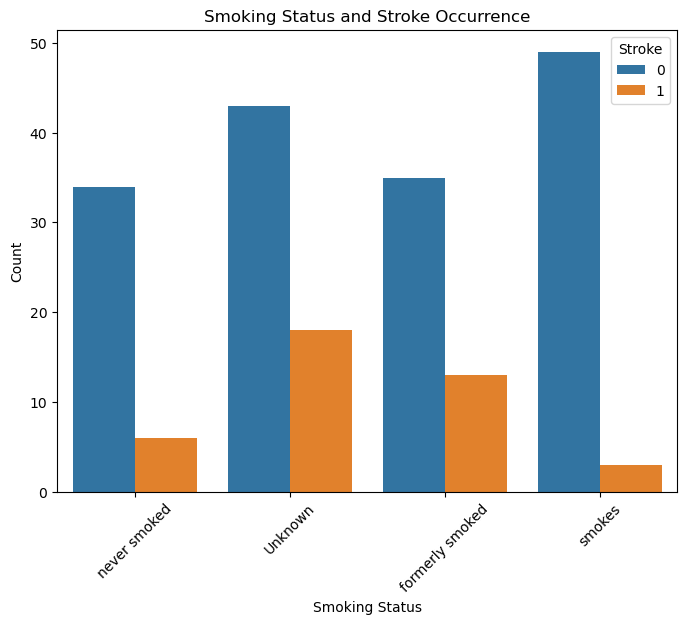

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='smoking_status', hue='stroke', data=data)
plt.title('Smoking Status and Stroke Occurrence')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke', loc='upper right')
plt.show()

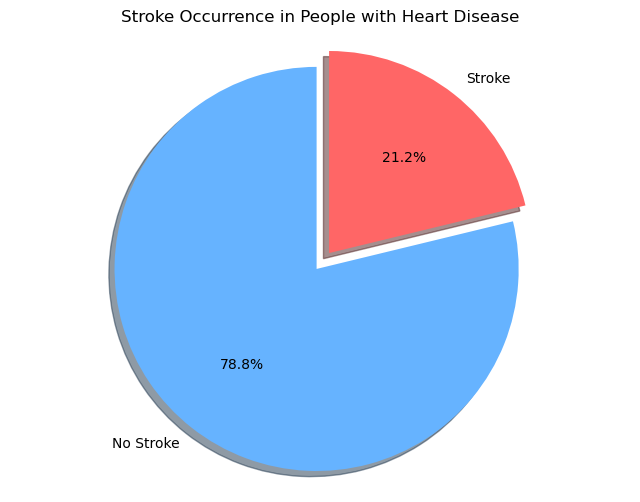

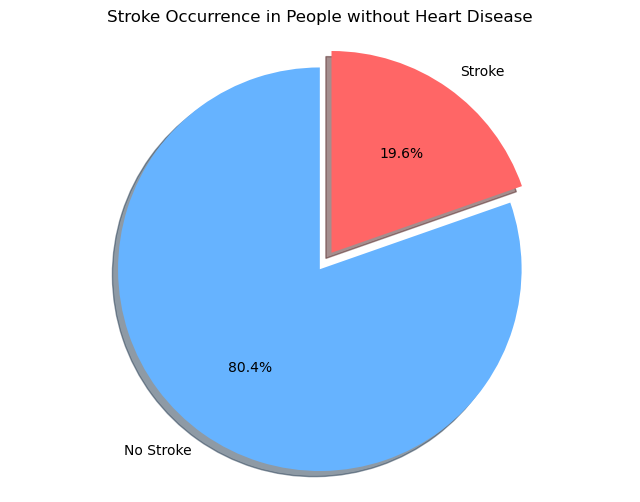

In [23]:
heart_disease_stroke_counts = data.groupby(['heart_disease', 'stroke']).size().unstack()

# Create a pie chart for stroke occurrence in people with heart disease
plt.figure(figsize=(8, 6))

# For people with heart disease (heart_disease = 1)
labels = ['No Stroke', 'Stroke']
sizes = heart_disease_stroke_counts.loc[1]
colors = ['#66b3ff', '#ff6666']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1), shadow=True)
plt.title('Stroke Occurrence in People with Heart Disease')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

# Create a pie chart for stroke occurrence in people without heart disease
plt.figure(figsize=(8, 6))

# For people without heart disease (heart_disease = 0)
sizes = heart_disease_stroke_counts.loc[0]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1), shadow=True)
plt.title('Stroke Occurrence in People without Heart Disease')
plt.axis('equal')
plt.show()